In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import statsmodels.api as sm

# Background
TransJakarta, launched on January 15, 2004, is a bus rapid transit (BRT) system in Jakarta, Indonesia, and was the first of its kind in Southeast Asia. Designed to address Jakarta's severe traffic congestion, it operates on dedicated bus lanes that allow for faster and more reliable transit. The system has grown significantly from a single corridor to one of the largest BRT networks in the world, with numerous corridors spanning the city and surrounding areas. TransJakarta's fleet includes standard, articulated, and electric buses, with the service running 24/7. Despite challenges like traffic congestion and overcrowding during peak hours, the system has made a substantial impact by improving urban mobility, reducing environmental pollution, and enhancing public access to transportation. The future of TransJakarta includes plans for further expansion, sustainability initiatives with electric buses, and better integration with other public transport systems in the Jakarta metropolitan area.

# Cases
1. Age Distribution ([source](https://www.antaranews.com/berita/3992097/jumlah-penumpang-transjakarta-januari-2024-capai-30-juta))
    - What does the concentration of individuals in a specific age range suggest about the demographic that primarily uses the service?

2. Tap-In and Tap-Out ([source](https://smartcity.jakarta.go.id/id/blog/daftar-lengkap-14-koridor-di-rute-transjakarta/))
    - Why are certain stops highly popular for both tap-in and tap-out, and what does this indicate about their role in the transportation network?
    - What factors might contribute to certain stops being rarely used, and how can their utilization be improved?

3. Corridors ([source](https://megapolitan.kompas.com/read/2024/07/05/17181231/armada-transjakarta-dinilai-minim-warga-special-mention-untuk-koridor-3))
    - What characteristics of the busiest corridors make them dominate in terms of passenger volume, and how can this be managed effectively?
    - What might be the reasons for certain corridors having significantly fewer passengers, and what strategies can be employed to address this underutilization?

In [4]:
df = pd.read_csv('cleaned_Trans.csv')

# Peak Travel Times

In [5]:
# Ensure tapInTime and tapOutTime are in datetime format
df['tapInTime'] = pd.to_datetime(df['tapInTime'])
df['tapOutTime'] = pd.to_datetime(df['tapOutTime'])

# Extract hour and weekday information
df['tapInHour'] = df['tapInTime'].dt.hour
df['tapOutHour'] = df['tapOutTime'].dt.hour
df['weekday'] = df['tapInTime'].dt.weekday
df['day_of_week'] = df['tapInTime'].dt.day_name()

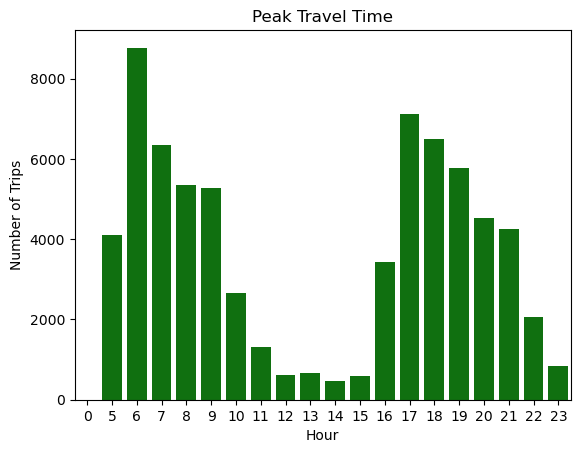

In [41]:
def tapGroup(data, by: str):
    return data.groupby(by)['transID'].count()

def combineTap(fn1, fn2):
    return fn1.add(fn2, fill_value=0)

count_hours = combineTap(tapGroup(df, 'tapInHour'), tapGroup(df, 'tapOutHour'))

def peakBar(data):
    sns.barplot(x=data.index, y=data.values, color='green')
    plt.title('Peak Travel Time')
    plt.xlabel('Hour')
    plt.ylabel('Number of Trips')
    plt.show()

peakBar(count_hours)

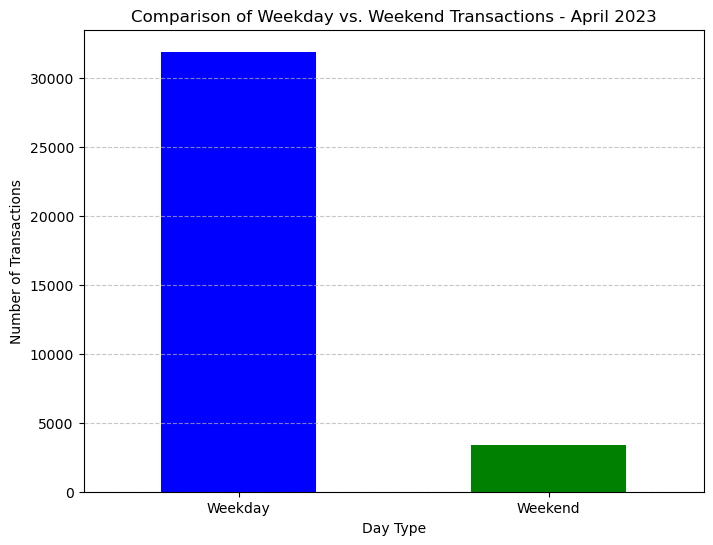

In [7]:
# Group transactions by weekday vs. weekend
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday'])
weekday_vs_weekend = df.groupby('is_weekend').size()

# Rename the index for clarity
weekday_vs_weekend.index = ['Weekday', 'Weekend']

# Plot the comparison of weekday vs. weekend transactions
plt.figure(figsize=(8, 6))
weekday_vs_weekend.plot(kind='bar', color=['blue', 'green'])
plt.title('Comparison of Weekday vs. Weekend Transactions - April 2023')
plt.xlabel('Day Type')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


# Most TapIn and TapOut

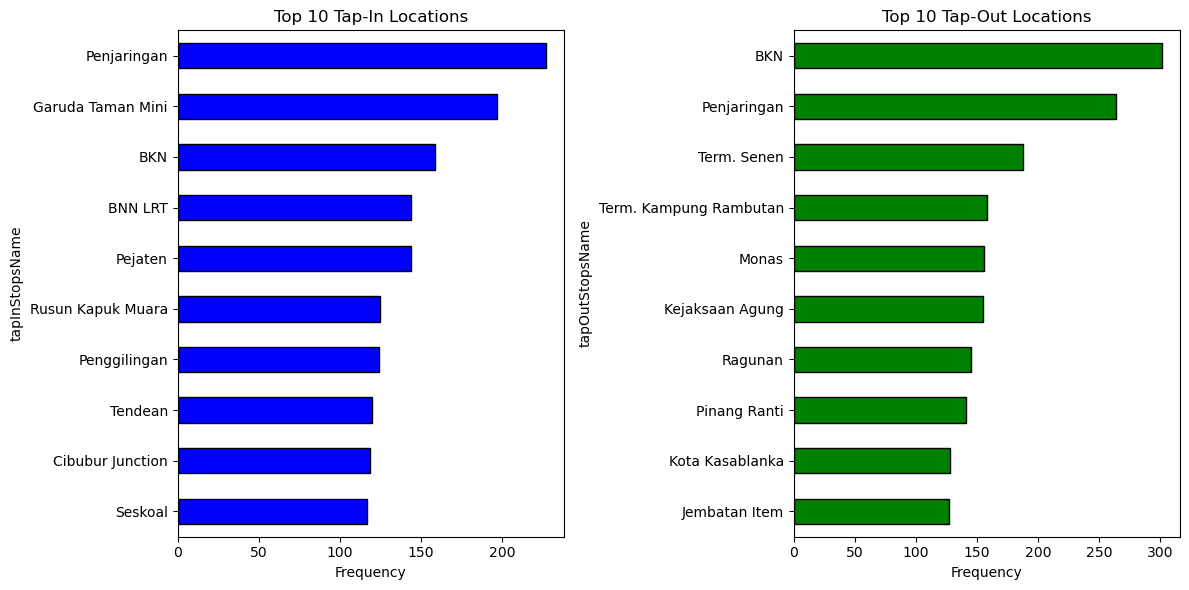

In [34]:
# Count the frequency of each tap-in and tap-out stop
tap_in_counts = df['tapInStopsName'].value_counts()
tap_out_counts = df['tapOutStopsName'].value_counts()

# Plot the most common tap-in locations
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
tap_in_counts.head(10).plot(kind='barh', color='blue', edgecolor='black')
plt.title('Top 10 Tap-In Locations')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

# Plot the most common tap-out locations
plt.subplot(1, 2, 2)
tap_out_counts.head(10).plot(kind='barh', color='green', edgecolor='black')
plt.title('Top 10 Tap-Out Locations')
plt.xlabel('Frequency')
plt.gca().invert_yaxis()

plt.tight_layout()
plt.show()

"It can be seen from the table below that the highest number of tap-ins occurred at the Penjaringan corridor, with a total of 227 . Meanwhile, the highest number of tap-outs was at the BKN corridor, with a total of 301 taps."

# Age Distribution

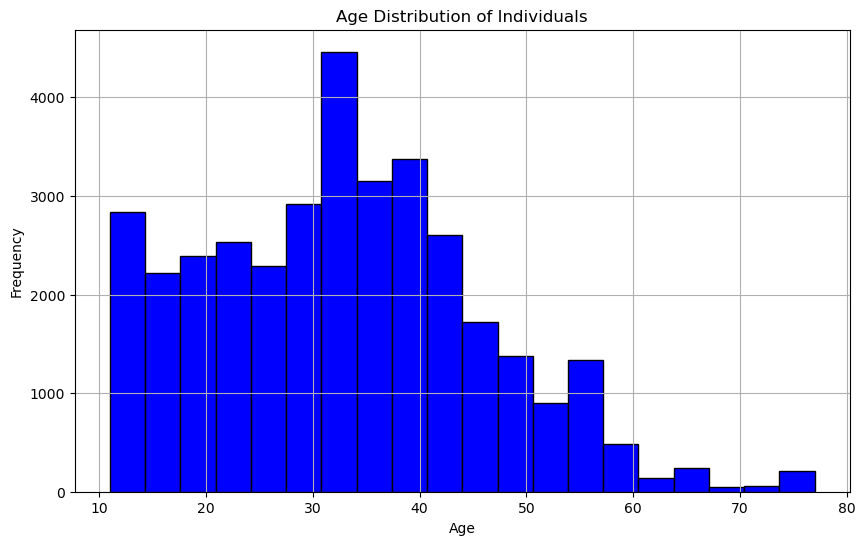

In [35]:
# Calculate the current year
current_year = 2023

# Calculate age
df['age'] = current_year - df['payCardBirthDate']

# Plot the age distribution
plt.figure(figsize=(10, 6))
plt.hist(df['age'], bins=20, color='blue', edgecolor='black')
plt.title('Age Distribution of Individuals')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Corridor with Most and Least Passenger

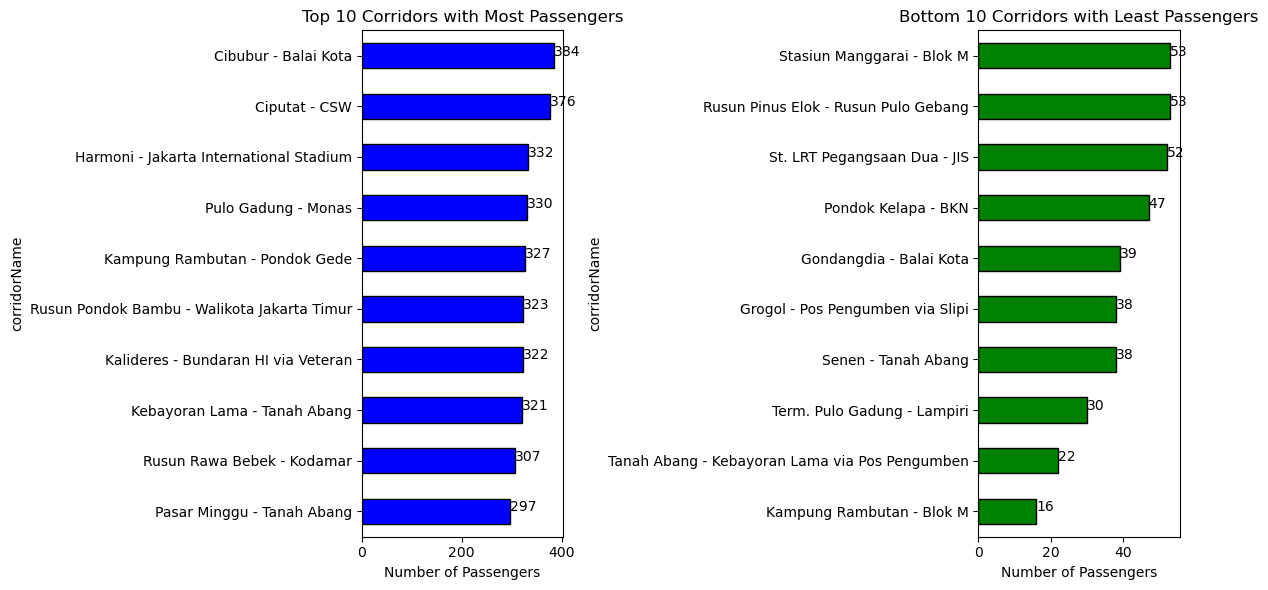

In [39]:
# Count the number of passengers per corridor
corridor_counts = df['corridorName'].value_counts()

# Plot the corridors with the most and least passengers with values shown
plt.figure(figsize=(12, 6))

# Top 10 Corridors with Most Passengers
plt.subplot(1, 2, 1)
corridor_most = corridor_counts.head(10)
corridor_most.plot(kind='barh', color='blue', edgecolor='black')
plt.title('Top 10 Corridors with Most Passengers')
plt.xlabel('Number of Passengers')
plt.gca().invert_yaxis()

# Adding the value labels
for index, value in enumerate(corridor_most):
    plt.text(value, index, str(value))

# Bottom 10 Corridors with Least Passengers
plt.subplot(1, 2, 2)
corridor_least = corridor_counts.tail(10)
corridor_least.plot(kind='barh', color='green', edgecolor='black')
plt.title('Bottom 10 Corridors with Least Passengers')
plt.xlabel('Number of Passengers')
plt.gca().invert_yaxis()

# Adding the value labels
for index, value in enumerate(corridor_least):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()

# Conclusion:

- Peak Travel Time
The data shows a clear pattern of transportation activity corresponding to typical commuting times. There is a significant spike in trips between 5 AM and 8 AM, reflecting the morning rush hour as people commute to work or school. After 9 AM, trips decrease sharply, reaching a low between 11 AM and 2 PM, likely when most people are settled at their destinations. A second peak occurs from 4 PM to 6 PM, aligning with the evening rush hour as people return home. Additionally, the vast majority of transactions happen on weekdays, with over 30,000 transactions, indicating higher commuter activity compared to weekends.

- Age Distribution
The age distribution shows a concentration of individuals in a specific age range. This likely indicates a certain demographic group that primarily uses the service, possibly younger or middle-aged adults.

- Tap-In and Tap-Out Analysis
Most Frequent Stops : Certain stops are highly popular as both tap-in and tap-out locations, indicating they are key hubs or popular destinations.
Least Frequent Stops : Some stops are rarely used, suggesting they serve less populated areas or less popular routes.

- Most and Least Corridor Analysis
Busiest Corridors : A few corridors dominate in terms of passenger volume, likely serving high-demand areas or major routes.
Least Busy Corridors : Conversely, some corridors have significantly fewer passengers, which might indicate underutilization or coverage of areas with low demand.

# Solutions

For Age Groups
- Tailored Services: If a particular age group dominates, tailor services to their needs. For instance, younger users might appreciate mobile ticketing options, while older users might value clear signage and seating availability.
- Inclusive Planning: Ensure that services are accessible to all age groups, possibly considering special routes or services for underrepresented age groups.

For the Most Frequent Stops
- Enhance Services: Consider increasing the frequency of services in these areas to accommodate high demand, reducing wait times, and improving customer satisfaction.
- Infrastructure Improvement: Upgrading infrastructure, such as shelters, seating, or digital information boards, at these popular stops can improve the user experience.
- Marketing Opportunities: These hubs can be targeted for marketing campaigns or partnerships due to high foot traffic.

For the Least Frequent Stops ([source](https://metro.tempo.co/read/578772/koridor-baru-transjakarta-masih-sepi-penumpang))
- Analyze and Adapt Services: Evaluate the reasons for low usage—whether it’s due to service timings, lack of awareness, or poor connectivity. Adjust services accordingly, perhaps by rerouting, changing schedules, or even reducing service frequency if it's not justifiable.
- Community Engagement: Engage with local communities to understand their needs better. This might involve adjusting routes or service times to better fit their schedules, which could increase usage.
- Promotional Campaigns: Launch promotional campaigns to raise awareness of these lesser-used routes and stops, possibly offering discounts or incentives to encourage more usage.

For Corridor
- Investment in Key Corridors: Focus investment on improving the infrastructure and service quality of the busiest corridors to ensure they can handle the high volume of passengers without degradation of service.
- Reallocation of Resources: Consider reallocating resources from underutilized corridors to those with higher demand, or use the savings to enhance community outreach and service adaptation in underutilized areas.

